In [1]:
%load_ext jupyter_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# pandas и seaborn только для отрисовки красивых графиков, сам класс nnls использует только numpy!
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.datasets import make_sparse_coded_signal
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
rng = np.random.default_rng(42)

In [4]:
sns.set_style("whitegrid")
sns.despine()

<Figure size 640x480 with 0 Axes>

Let's load our data

In [5]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 6]

<Axes: xlabel='x', ylabel='y'>

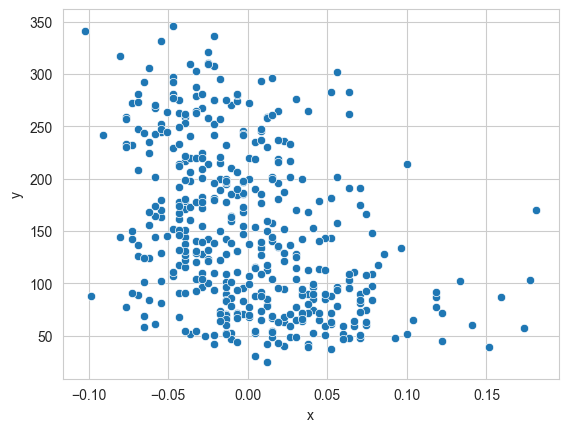

In [6]:
data = np.hstack([diabetes_X, diabetes_y.reshape(-1, 1)])

sns.scatterplot(pd.DataFrame(data, columns=["x", "y"]), x="x", y="y")

Since we can't use `scipy.optmize`, I'll write a custom optimizer instead, I guess... 

Module `optimize.py` provides 1-D and N-D optimizator functions|

In [7]:
from optimizers import powell_optimizer

Now, let's implement the nnls linreg for the 2D case

In [8]:
class nnls_custom:

    def __init__(self):

        self.weights_ = None

    def fit(self, x_train: np.array, y_train: np.array):

        n = y_train.shape[0]
        b = y_train.reshape(
            -1,
        )
        A = np.hstack([np.ones((n, 1)), x_train.reshape(-1, 1)])

        # def loss(w, mu):
        #     return np.linalg.norm(b - A @ w.reshape(-1, 1)) + np.sum(mu * w)

        # self.res_ = powell_optimizer(
        #     lambda x: loss(x[:-2], x[-2:]),
        #     np.zeros((4,)),
        # )

        def loss(w):
            return np.linalg.norm(b - A @ w)

        self.res_ = powell_optimizer(
            loss,
            np.zeros((2,)),
        )

        # if (self.res_["x"] > 0).all():
        #     self.weights_ = self.res_["x"][: -A.shape[1]]
        #     print("KKT condition is satisfied!!!")

In [9]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [10]:
regr = nnls_custom()
regr.fit(diabetes_X_train, diabetes_X_train)

In [11]:
regr.res_["x"]

array([-5.08014712e-04,  9.99764880e-01])

<Axes: xlabel='x', ylabel='y'>

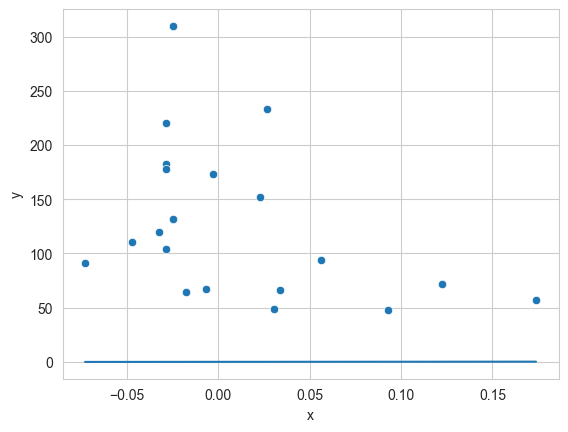

In [12]:
sns.scatterplot(
    pd.DataFrame(
        np.hstack([diabetes_X_test, diabetes_y_test.reshape(-1, 1)]), columns=["x", "y"]
    ),
    x="x",
    y="y",
)
sns.lineplot(
    pd.DataFrame(
        np.hstack(
            [diabetes_X_test, regr.res_["x"][0] + regr.res_["x"][1] * diabetes_X_test]
        ),
        columns=["x", "y"],
    ),
    x="x",
    y="y",
)